# Highest paid athletes
The project gives the information about the highes paid athletes . The dataset using in this project is from kaggle and it provide the information from year 1990 - 2020

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
dataset_url = 'https://www.kaggle.com/parulpandey/forbes-highest-paid-athletes-19902019' 

The dataset has been downloaded and extracted.

In [5]:
data_dir = './Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv'

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "course-project-on-forbes-richest-athletes" 

In [7]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "amannagarkoti/course-project-on-forbes-richest-athletes"
[jovian] Committed successfully! https://jovian.ai/amannagarkoti/course-project-on-forbes-richest-athletes


'https://jovian.ai/amannagarkoti/course-project-on-forbes-richest-athletes'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions:
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [11]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd

In [13]:
data_df=pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")

In [14]:
data_df.shape

(301, 8)

In [15]:
data_df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [16]:
data_df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [17]:
data_df[data_df['earnings ($ million)'] >= 300]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0


In [18]:
import jovian

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "amannagarkoti/course-project-on-forbes-richest-athletes" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/amannagarkoti/course-project-on-forbes-richest-athletes


'https://jovian.ai/amannagarkoti/course-project-on-forbes-richest-athletes'

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Highest spending year
This graph tells us that in which year money spent is the most

In [26]:
high_year = data_df.groupby('Year').sum()
high_year.sort_values('earnings ($ million)',ascending = False).head(10)

,S.NO,Current Rank,earnings ($ million)
Year,,,
2018,2765,55,1059.4
2015,2465,55,950.3
2019,2865,55,941.4
2020,2965,55,819.2
2014,2365,55,642.4
2016,2565,55,635.2
2017,2665,54,623.7
2013,2265,55,552.5
2012,2165,55,543.1


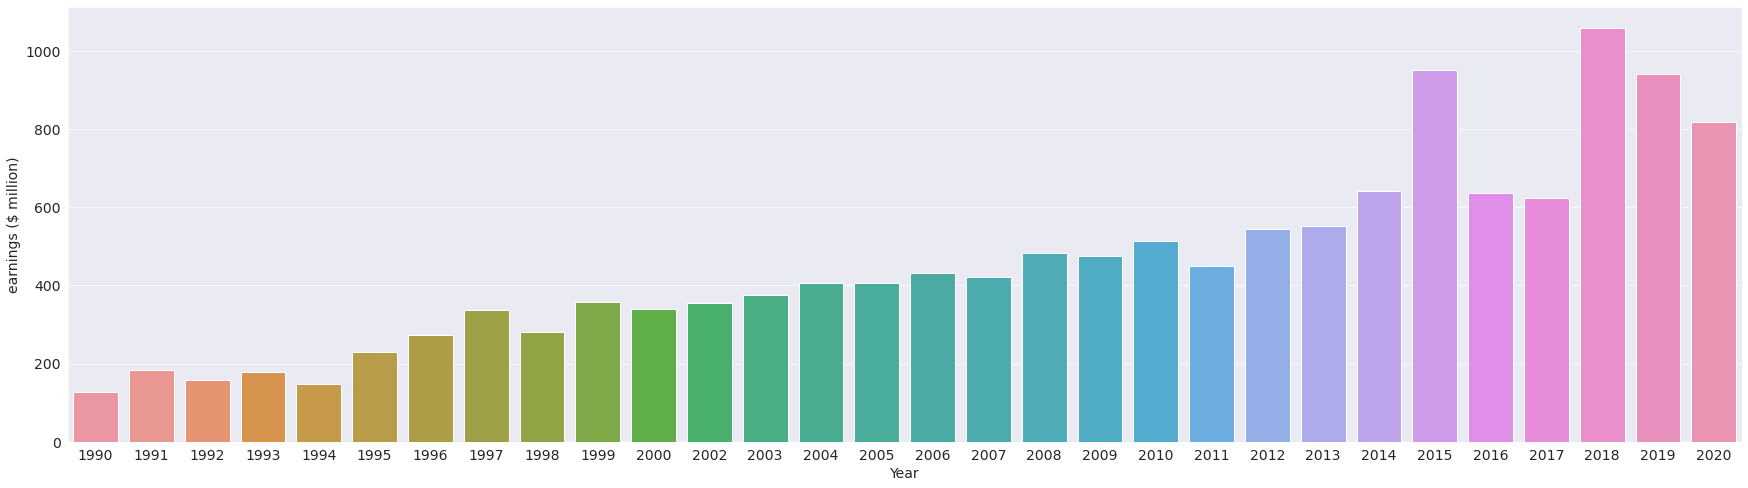

In [77]:
plt.figure(figsize=(30,8))
sns.barplot(x=high_year.index, y='earnings ($ million)', data=high_year);

## Most recurring country
This graph tells us that which country has the highest number of players in the dataset

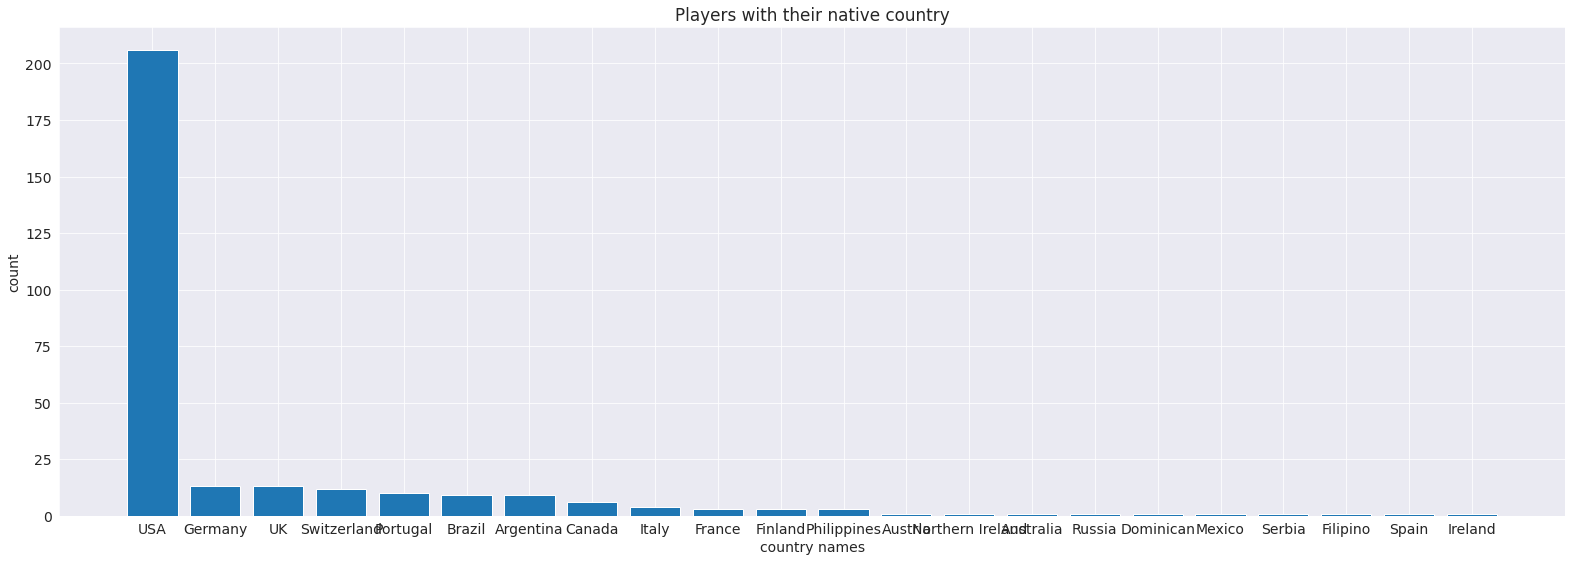

In [37]:
plt.figure(figsize=(27,9))
plt.bar(list(data_df["Nationality"].value_counts().keys()),list(data_df["Nationality"].value_counts()))
plt.title("Players with their native country")
plt.ylabel("count")
plt.xlabel("country names")
plt.show()

Most recurring country is USA

## Most popular Sport
This graph tells us that which is the most popular sport in the dataset

In [38]:
data_df["Sport"].value_counts()


Basketball                      54
Boxing                          29
basketball                      27
Golf                            24
Soccer                          22
golf                            20
Tennis                          18
American Football               17
boxing                          17
soccer                          11
Auto Racing                     10
F1 racing                        8
auto racing                      7
F1 Motorsports                   5
tennis                           5
motorcycle gp                    4
baseball                         3
Baseball                         3
NASCAR                           3
NFL                              3
Auto Racing (Nascar)             2
Ice Hockey                       2
Auto racing                      1
Hockey                           1
cycling                          1
NBA                              1
MMA                              1
American Football / Baseball     1
ice hockey          

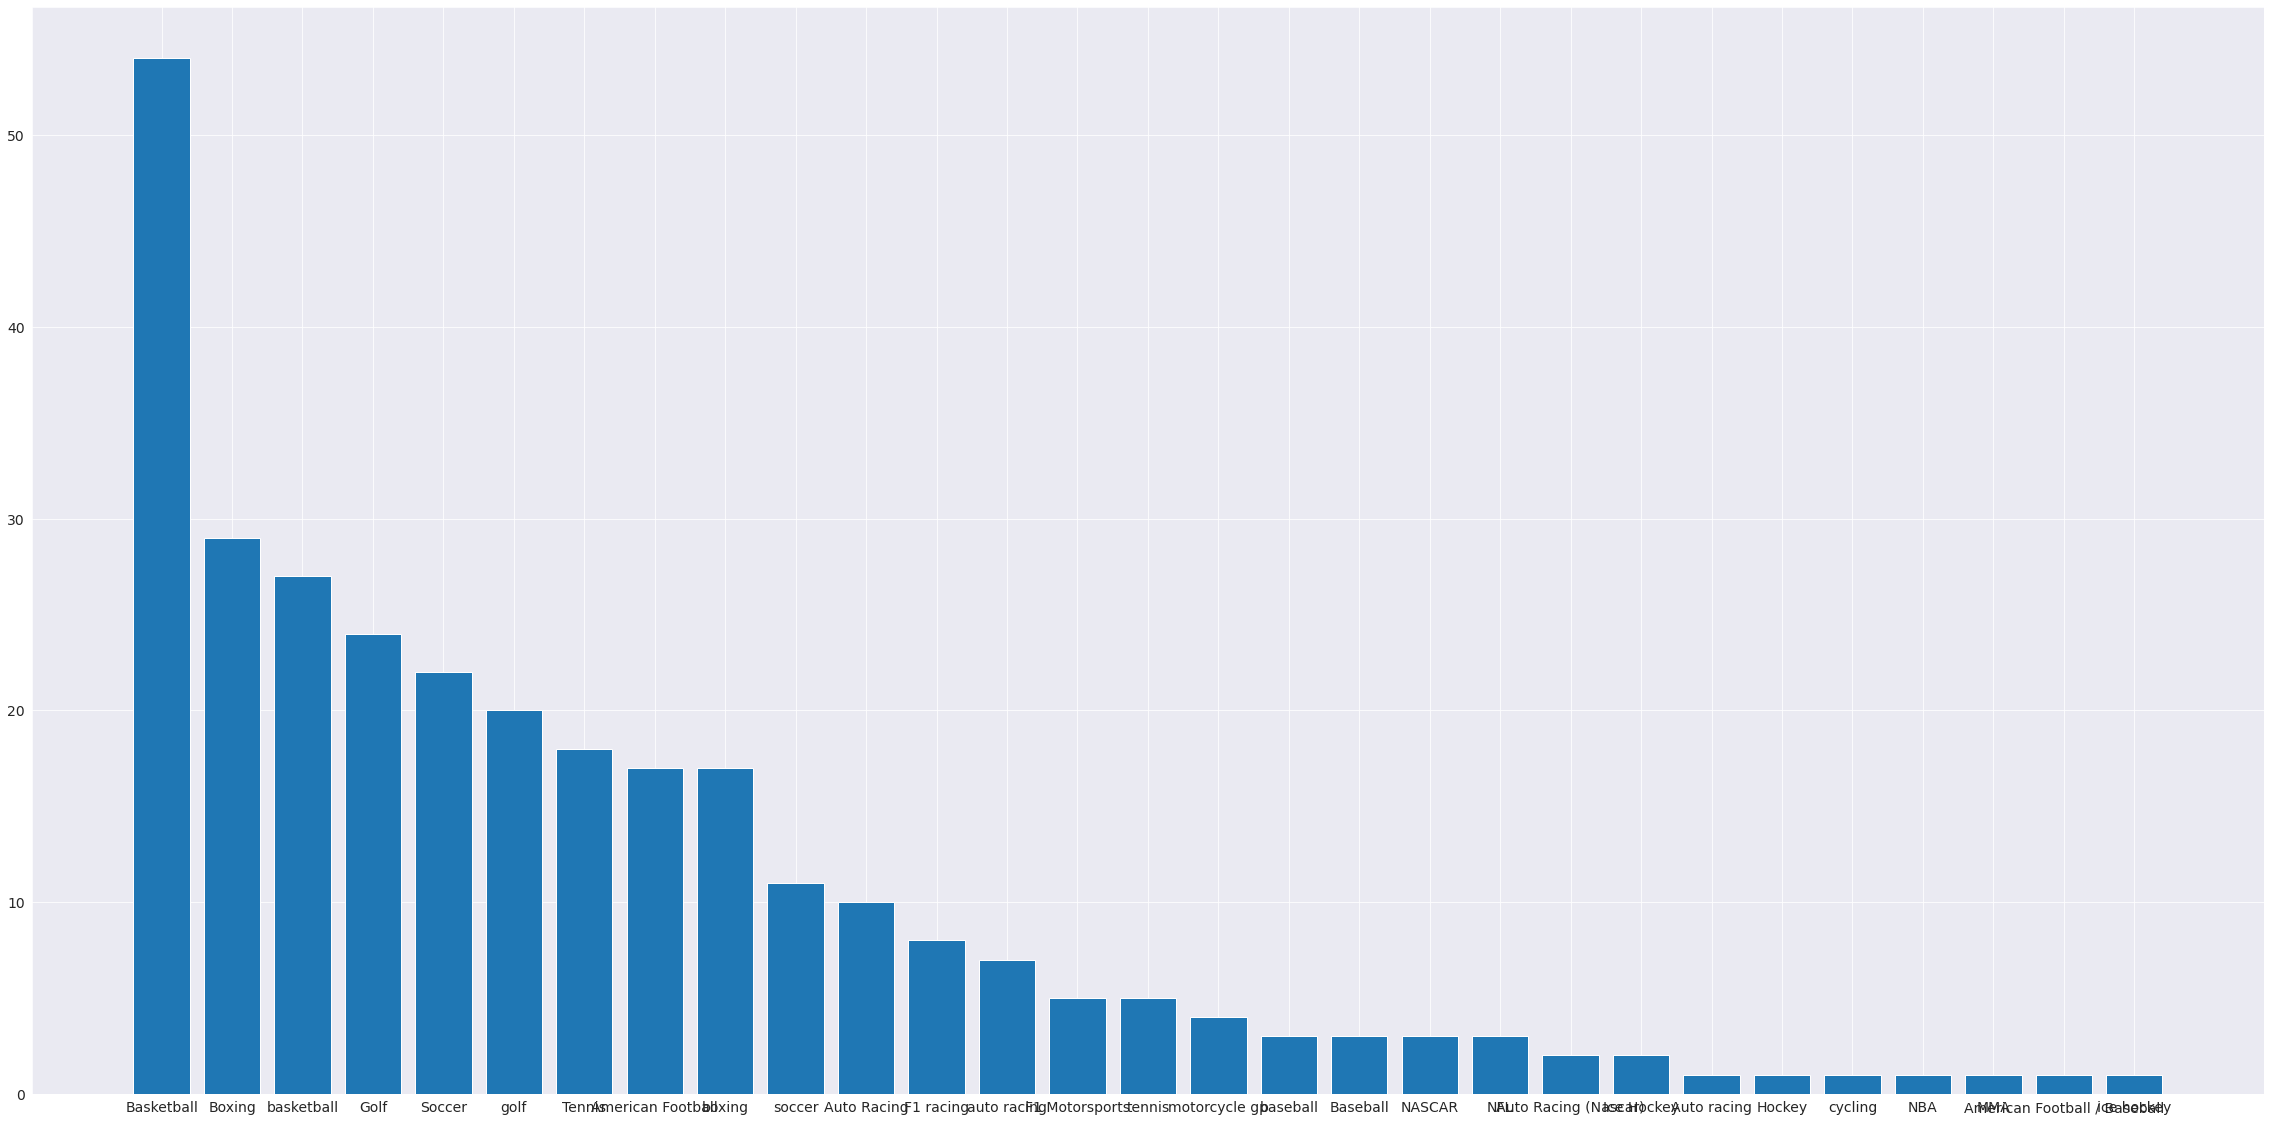

In [41]:
plt.figure(figsize=(40,20))
plt.bar(list(data_df["Sport"].value_counts().keys()),list(data_df["Sport"].value_counts()));

Basketball is the most popular sport in the dataset

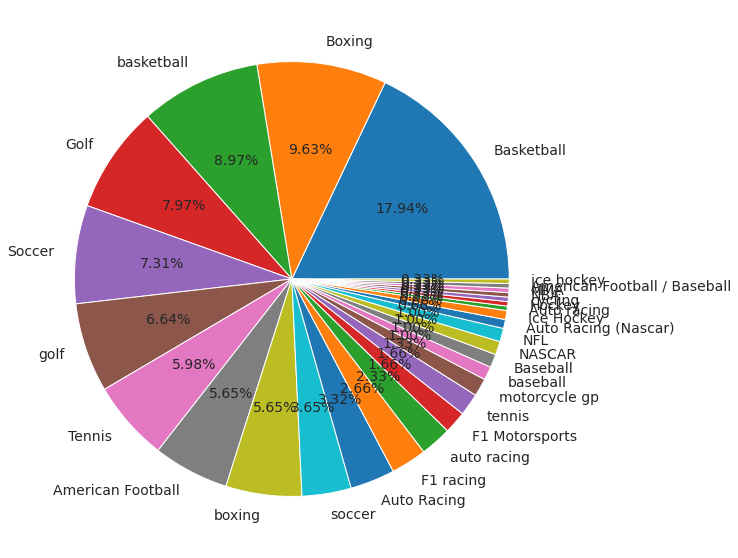

In [52]:
plt.figure(figsize=(20,10))
plt.pie(list(data_df["Sport"].value_counts()),labels=list(data_df["Sport"].value_counts().keys()),autopct="%0.2f%%")
plt.show()

Above is a pie-chart for the sports in the dataset

## Most Popular Year
The below observation tells about most popular year using histogram

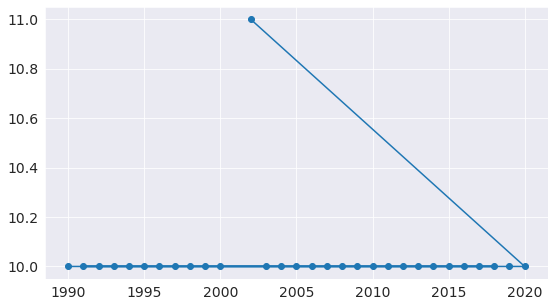

In [51]:
plt.plot(list(data_df["Year"].value_counts().keys()),list(data_df["Year"].value_counts()),marker="o");

Let us save and upload our work to Jovian before continuing

In [53]:
import jovian

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "amannagarkoti/course-project-on-forbes-richest-athletes" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/amannagarkoti/course-project-on-forbes-richest-athletes


'https://jovian.ai/amannagarkoti/course-project-on-forbes-richest-athletes'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: Which player obtained the no.1 rank most times

In [57]:
rank_1=data_df[data_df["Current Rank"]==1]

In [58]:
rank_1

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
10,11,Evander Holyfield,USA,1,8,boxing,1991,60.5
20,21,Michael Jordan,USA,1,3,Basketball,1992,35.9
30,31,Michael Jordan,USA,1,1,Basketball,1993,36.0
40,41,Michael Jordan,USA,1,1,Basketball,1994,30.0
50,51,Michael Jordan,USA,1,1,basketball,1995,43.9
60,61,Mike Tyson,USA,1,2,Boxing,1996,75.0
70,71,Michael Jordan,USA,1,2,Basketball,1997,78.3
80,81,Michael Jordan,USA,1,NaN,Basketball,1998,69.0
90,91,Michael Schumacher,Germany,1,2,Auto Racing,1999,49.0


In [61]:
rank_1["Name"].value_counts()

Tiger Woods           11
Michael Jordan         6
Floyd Mayweather       4
Michael Schumacher     2
Mike Tyson             2
Cristiano Ronaldo      2
Lionel Messi           1
Evander Holyfield      1
Roger Federer          1
Name: Name, dtype: int64

Tiger Woods has obtained #1 rank most times

#### Q2: What sport is played the most in each country

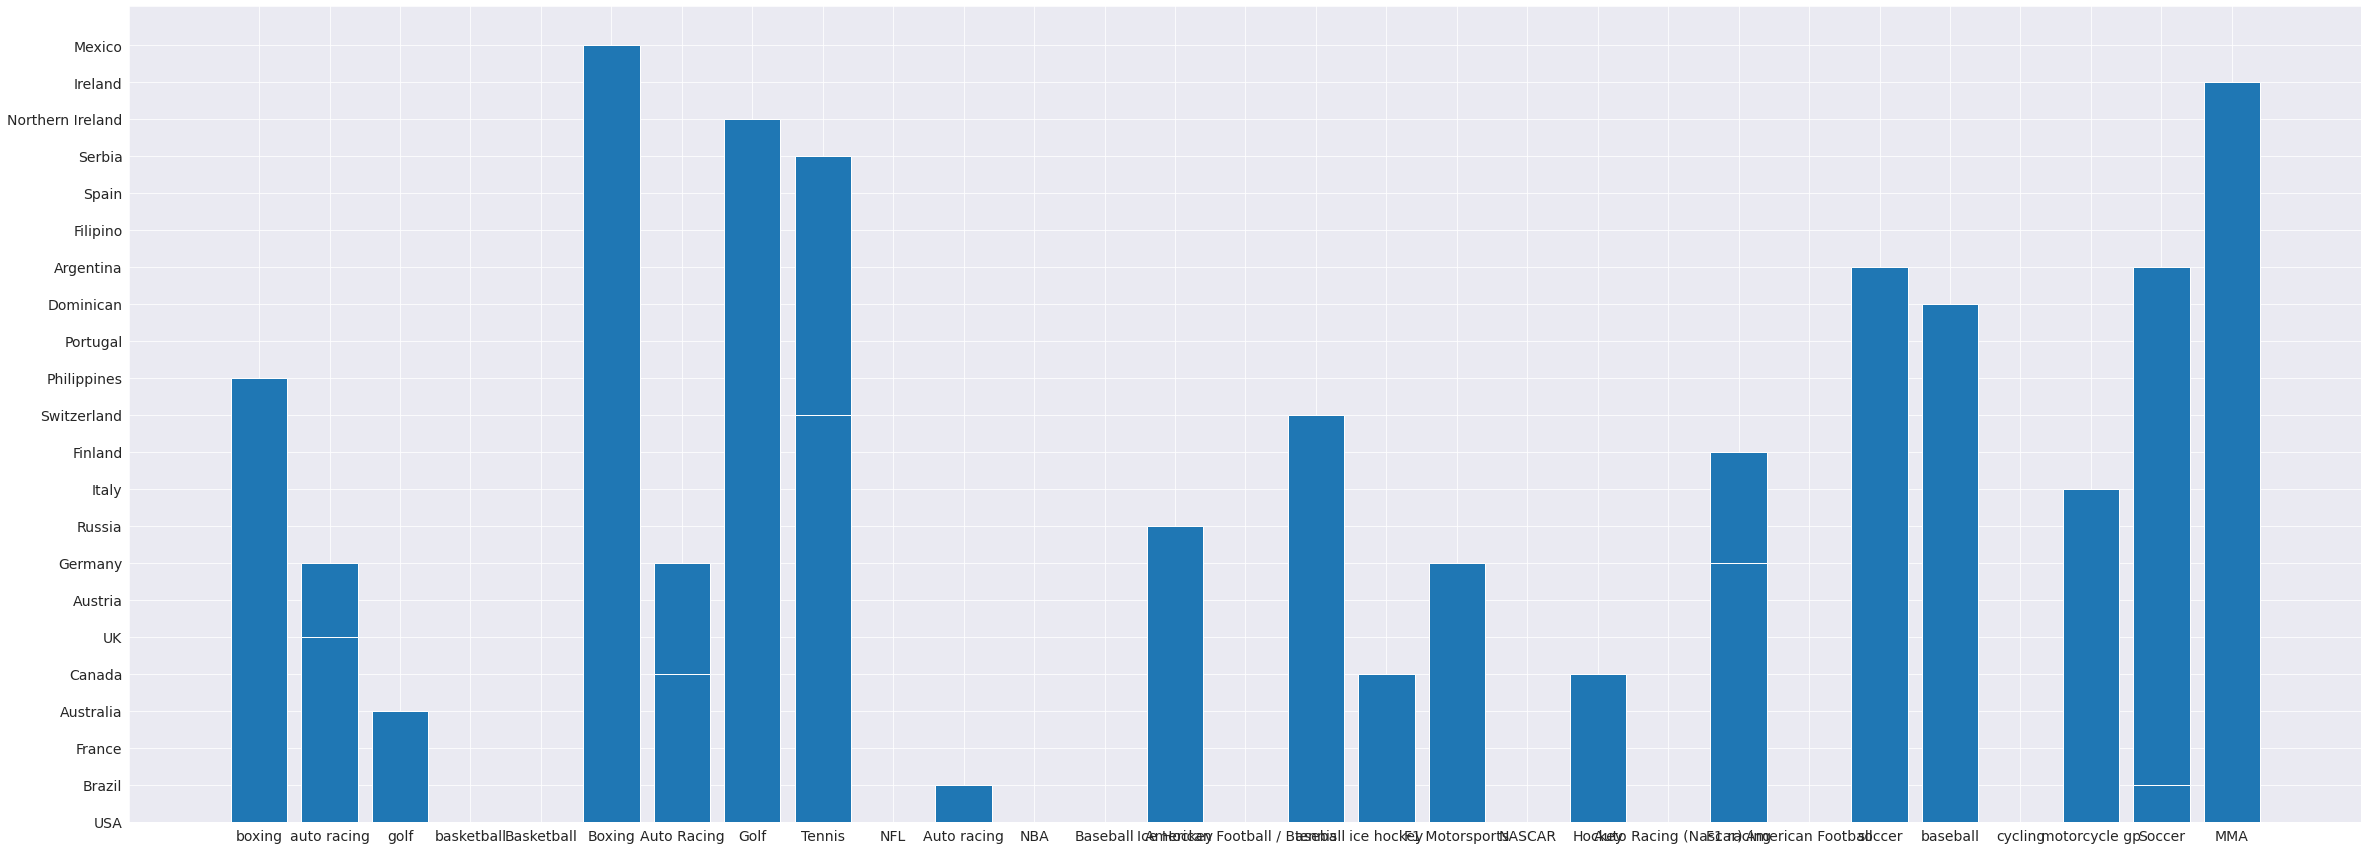

In [71]:
plt.figure(figsize=(40,15))
name_df=data_df["Sport"]
nationality_df=data_df["Nationality"]
plt.bar(name_df, nationality_df);

#### What is the trend of earning of athletes with time

In [72]:
high_year = data_df.groupby('Year').sum()
high_year.sort_values('earnings ($ million)',ascending=False).head(7)

,S.NO,Current Rank,earnings ($ million)
Year,,,
2018,2765,55,1059.4
2015,2465,55,950.3
2019,2865,55,941.4
2020,2965,55,819.2
2014,2365,55,642.4
2016,2565,55,635.2
2017,2665,54,623.7


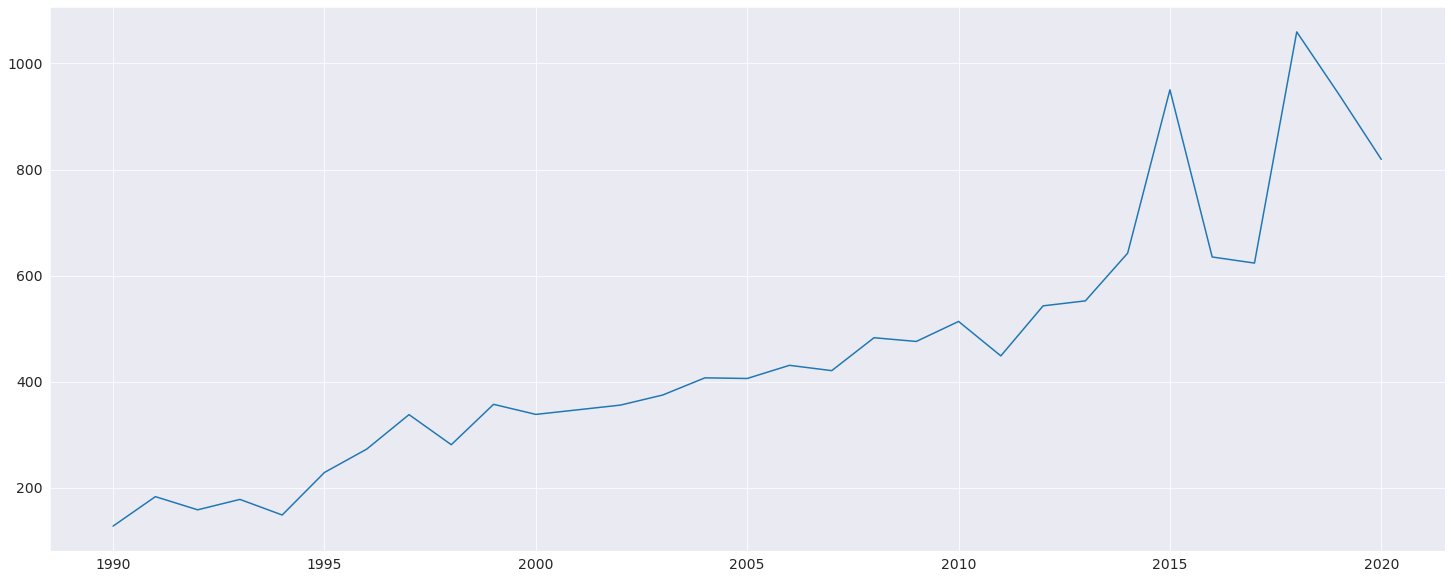

In [73]:
plt.figure(figsize=(25,10))
plt.plot(high_year.index, 'earnings ($ million)', data=high_year);

The earning of athletes is increasing with time

#### Q4: Which country has most number of players

<AxesSubplot:xlabel='Nationality'>

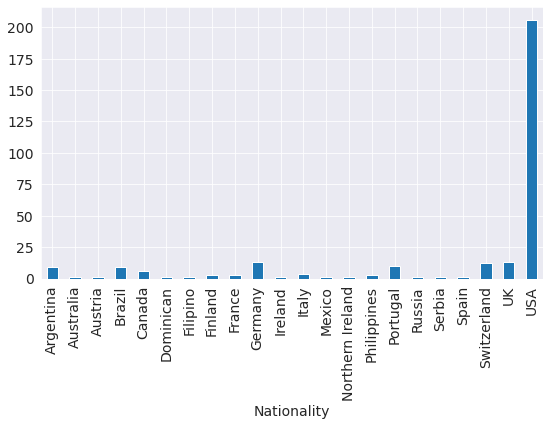

In [78]:
Nationality=data_df.groupby(['Nationality'])
Nationality
plt.clf()
data_df.groupby(['Nationality']).size().plot(kind='bar')


In [79]:
plt.show()

USA has the most number of players

#### Q5: Which sports is the most earning sport?

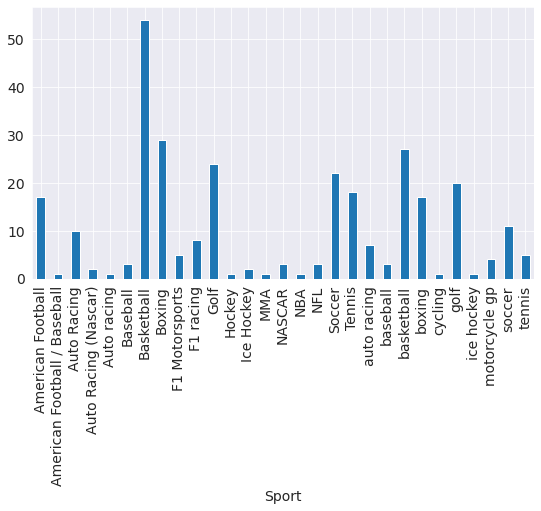

In [80]:
sport=data_df.groupby(['Sport'])
earning=data_df.groupby(['earnings ($ million)'])
plt.clf()
data_df.groupby('Sport').size().plot(kind='bar')
plt.show()

Basketball is the most earninng sport

Let us save and upload our work to Jovian before continuing.

In [81]:
import jovian

In [82]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "amannagarkoti/course-project-on-forbes-richest-athletes" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/amannagarkoti/course-project-on-forbes-richest-athletes


'https://jovian.ai/amannagarkoti/course-project-on-forbes-richest-athletes'

## Inferences and Conclusion

The above work depicts the data of forbes richest athletes in te

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [32]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'